***First multivariate statistics homework***

Nestor David Rendon Hurtado 
cc:1152686816




**0)Data explanation**

This data belong to 27 indices that were optained for an acoustic recordings dataset along 10 days. 
The recordings were collected for monitoring diferent colombian places wich have as their main characteristic belonging to the tropycal dry forest. 

Experimental units show the average of indices for the recordings of diferent days and diferent places (each place have diferents states of biodiversity), with the condition of use a minimum of 144 recordings for day. 

Each indice show diferents characteristics of biodiversity levels according to three features: Time, frecuency and amplitude.  



In [ ]:
#install.packages("factanal")
#install.packages("psy")
#install.packages("nFactors")
#install.packages("GPArotation")
#install.packages("Rgraphviz")    
#install.packages("stats")
#install.packages("car")
#install.packages("factoextra")

 
    
#library(factanal)
#library(psy)
#library(nFactors)
library(GPArotation)
#library(Rgraphviz)
library(stats)
library(car)    

In [2]:
estandarizar<-function(x){
for (i in 7:length(x)) {   ##transformar datos a datos positivos 
 x[i]=dates[i]-min(dates[i])  #para poner todos los datos positivos 
 #x[i]<- (x[i]-min(x[i]))/(max(x[i])-min(x[i]))  #para poner todos los datos de 0 a 1 
  }
  return (x)
    
  }

1)*univariate analysis*:

  statistic measure (median, standar deviation, min, max)
  graphics: density, boxplot.
  Data standarization 


In [4]:
setwd('/Users/nesdav/Documents/estadisticamultivariada/entrenamiento') ## put working directory 
getwd()

datos<-read.csv(file="data.csv",header=T, sep=";") #the data is read 
attach(datos)
head(datos)
dim(datos)
dates=datos
x=dates
#x=estandarizar(datos) 


[1] "/Users/nesdav/Documents/estadisticamultivariada/entrenamiento"

The following objects are masked from datos (pos = 3):

    ACIft, ACItf, ADI, ADIm1, ADIm10, ADIm11, ADIm2, ADIm3, ADIm4,
    ADIm5, ADIm6, ADIm7, ADIm8, ADIm9, BI, BNF, BNT, CF, ESM, FM,
    Grabadora, Longitud, Lugar, M, MD, MID, NDSI, NP, P, Permanencia,
    RMS, SF, TE, Transformación, X



X,Lugar,Grabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,BI,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
20160121,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.4350581,1.2756625,-0.4399244,-0.1399083,⋯,-0.05386747,0.24283987,-0.1650974,0.42508235,-0.008937586,0.02647038,-0.4879605,-0.68330653,-0.1246885,0.4026433
20160122,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.5706609,0.8806682,-0.5694111,-0.5946314,⋯,0.13690524,0.44785938,-0.1295512,0.67579604,0.183419843,0.42532003,0.3789646,0.01327463,0.1739905,0.3712866
20161225,Guajira,5071,Alta,Alta,"73º26'25.7""W",-0.4242235,0.6805436,-0.5112027,0.5393115,⋯,0.38079024,-0.48679612,-1.2424054,-0.20825633,-0.144152505,-0.33748289,-0.6604183,0.25515804,0.3921317,0.7805500
20151216,Guajira,JSC5069,Baja,Baja,73º26'8.4''W,-0.2191518,1.1173119,-0.2908333,0.7830752,⋯,0.62356248,0.09588412,-0.8857552,-1.11873255,-0.821933994,-0.90122831,-0.6316543,0.25581858,0.7134680,0.6835989
20160121,Guajira,JSC5069,Baja,Baja,73º26'8.4''W,-0.5924180,0.4851330,-0.7071906,0.6984740,⋯,0.73556280,0.18563599,-0.4671831,0.04892081,0.189236802,0.64755724,0.2404618,0.77137305,0.7408529,0.6581274
20160122,Guajira,JSC5069,Baja,Baja,73º26'8.4''W,-0.7680140,0.1241397,-0.7345982,0.1477842,⋯,0.86782584,0.71283054,-0.2118724,0.36129253,0.404901822,0.81460634,0.6392907,1.06402022,0.9412845,0.5218428


[1] 10 35

In [5]:

head(x)

X,Lugar,Grabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,BI,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
20160121,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.4350581,1.2756625,-0.4399244,-0.1399083,⋯,-0.05386747,0.24283987,-0.1650974,0.42508235,-0.008937586,0.02647038,-0.4879605,-0.68330653,-0.1246885,0.4026433
20160122,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.5706609,0.8806682,-0.5694111,-0.5946314,⋯,0.13690524,0.44785938,-0.1295512,0.67579604,0.183419843,0.42532003,0.3789646,0.01327463,0.1739905,0.3712866
20161225,Guajira,5071,Alta,Alta,"73º26'25.7""W",-0.4242235,0.6805436,-0.5112027,0.5393115,⋯,0.38079024,-0.48679612,-1.2424054,-0.20825633,-0.144152505,-0.33748289,-0.6604183,0.25515804,0.3921317,0.7805500
20151216,Guajira,JSC5069,Baja,Baja,73º26'8.4''W,-0.2191518,1.1173119,-0.2908333,0.7830752,⋯,0.62356248,0.09588412,-0.8857552,-1.11873255,-0.821933994,-0.90122831,-0.6316543,0.25581858,0.7134680,0.6835989
20160121,Guajira,JSC5069,Baja,Baja,73º26'8.4''W,-0.5924180,0.4851330,-0.7071906,0.6984740,⋯,0.73556280,0.18563599,-0.4671831,0.04892081,0.189236802,0.64755724,0.2404618,0.77137305,0.7408529,0.6581274
20160122,Guajira,JSC5069,Baja,Baja,73º26'8.4''W,-0.7680140,0.1241397,-0.7345982,0.1477842,⋯,0.86782584,0.71283054,-0.2118724,0.36129253,0.404901822,0.81460634,0.6392907,1.06402022,0.9412845,0.5218428


In [6]:
x <- subset( x, select = -Longitud ) ##saco la var long por que no aporta nada
x <- subset( x, select = -BNT ) ##Saco la var BNT por que no aporta
datanum<-x[,c(7:33)]  #Cojo solo las variables 


In [7]:
head(datanum) 


ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
1.2756625,-0.4399244,-0.1399083,0.5144340,-0.09380857,0.09615837,-0.6263558,-1.2449353,-0.8008424,-0.72250253,⋯,-0.05386747,0.24283987,-0.1650974,0.42508235,-0.008937586,0.02647038,-0.4879605,-0.68330653,-0.1246885,0.4026433
0.8806682,-0.5694111,-0.5946314,0.5935596,0.40262208,-0.23337967,-0.6441693,-1.2464190,-0.9477854,-0.76403947,⋯,0.13690524,0.44785938,-0.1295512,0.67579604,0.183419843,0.42532003,0.3789646,0.01327463,0.1739905,0.3712866
0.6805436,-0.5112027,0.5393115,0.8996852,0.81642282,-1.55211792,-0.8827165,0.1639552,-0.2357752,0.74790500,⋯,0.38079024,-0.48679612,-1.2424054,-0.20825633,-0.144152505,-0.33748289,-0.6604183,0.25515804,0.3921317,0.7805500
1.1173119,-0.2908333,0.7830752,0.8928312,0.83205506,-0.58032962,-0.6733032,0.1585935,-0.4195157,0.09545116,⋯,0.62356248,0.09588412,-0.8857552,-1.11873255,-0.821933994,-0.90122831,-0.6316543,0.25581858,0.7134680,0.6835989
0.4851330,-0.7071906,0.6984740,0.9062814,0.59358103,-0.38185072,-0.8451052,0.1656253,-0.7057420,0.03456361,⋯,0.73556280,0.18563599,-0.4671831,0.04892081,0.189236802,0.64755724,0.2404618,0.77137305,0.7408529,0.6581274
0.1241397,-0.7345982,0.1477842,0.9079097,0.69537777,-0.96732320,-0.8783082,0.1646487,-0.7877812,0.26376623,⋯,0.86782584,0.71283054,-0.2118724,0.36129253,0.404901822,0.81460634,0.6392907,1.06402022,0.9412845,0.5218428


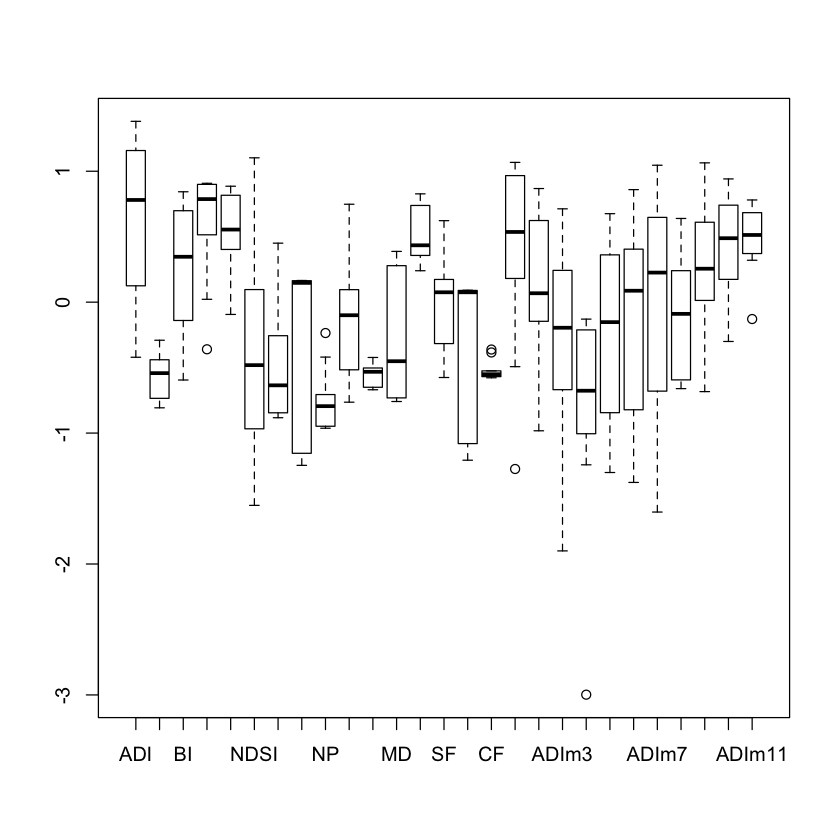

In [8]:
boxplot(datanum)


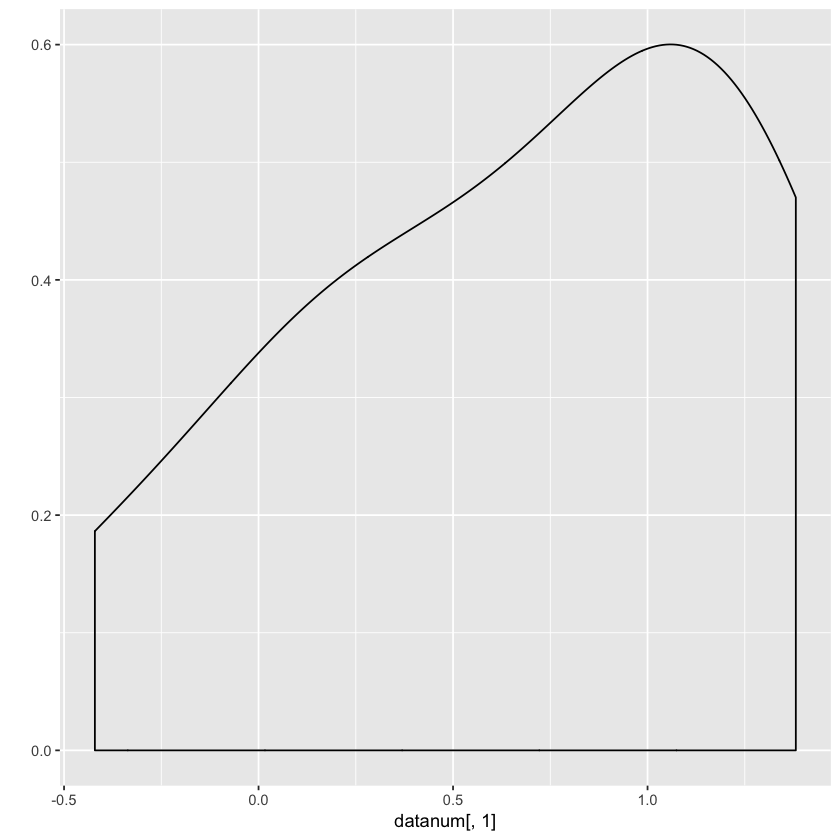

In [9]:
#install.packages("ggplot")
library(ggplot2)
#ejemplo de density trace de la primera variable (ADI), se nota una asimetria a la izquierda
qplot(datanum[,1],geom="density") #Density trace


**correlation analysis**
La matriz de correlación nos explica como se encuentran relacionadas cada una de las variables con otra variable.  Su diagonal siempre contendrá el valor de 1.   Si tiene un valor 0, nos indicará que no tiene ninguna relación con esa variable, por lo menos no lineal; es decir, pueda que tenga una relación cuadrática o de otro grado.


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
1.2756625,-0.4399244,-0.1399083,0.5144340,-0.09380857,0.09615837,-0.6263558,-1.2449353,-0.8008424,-0.72250253,⋯,-0.05386747,0.24283987,-0.1650974,0.42508235,-0.008937586,0.02647038,-0.4879605,-0.68330653,-0.1246885,0.4026433
0.8806682,-0.5694111,-0.5946314,0.5935596,0.40262208,-0.23337967,-0.6441693,-1.2464190,-0.9477854,-0.76403947,⋯,0.13690524,0.44785938,-0.1295512,0.67579604,0.183419843,0.42532003,0.3789646,0.01327463,0.1739905,0.3712866
0.6805436,-0.5112027,0.5393115,0.8996852,0.81642282,-1.55211792,-0.8827165,0.1639552,-0.2357752,0.74790500,⋯,0.38079024,-0.48679612,-1.2424054,-0.20825633,-0.144152505,-0.33748289,-0.6604183,0.25515804,0.3921317,0.7805500
1.1173119,-0.2908333,0.7830752,0.8928312,0.83205506,-0.58032962,-0.6733032,0.1585935,-0.4195157,0.09545116,⋯,0.62356248,0.09588412,-0.8857552,-1.11873255,-0.821933994,-0.90122831,-0.6316543,0.25581858,0.7134680,0.6835989
0.4851330,-0.7071906,0.6984740,0.9062814,0.59358103,-0.38185072,-0.8451052,0.1656253,-0.7057420,0.03456361,⋯,0.73556280,0.18563599,-0.4671831,0.04892081,0.189236802,0.64755724,0.2404618,0.77137305,0.7408529,0.6581274
0.1241397,-0.7345982,0.1477842,0.9079097,0.69537777,-0.96732320,-0.8783082,0.1646487,-0.7877812,0.26376623,⋯,0.86782584,0.71283054,-0.2118724,0.36129253,0.404901822,0.81460634,0.6392907,1.06402022,0.9412845,0.5218428


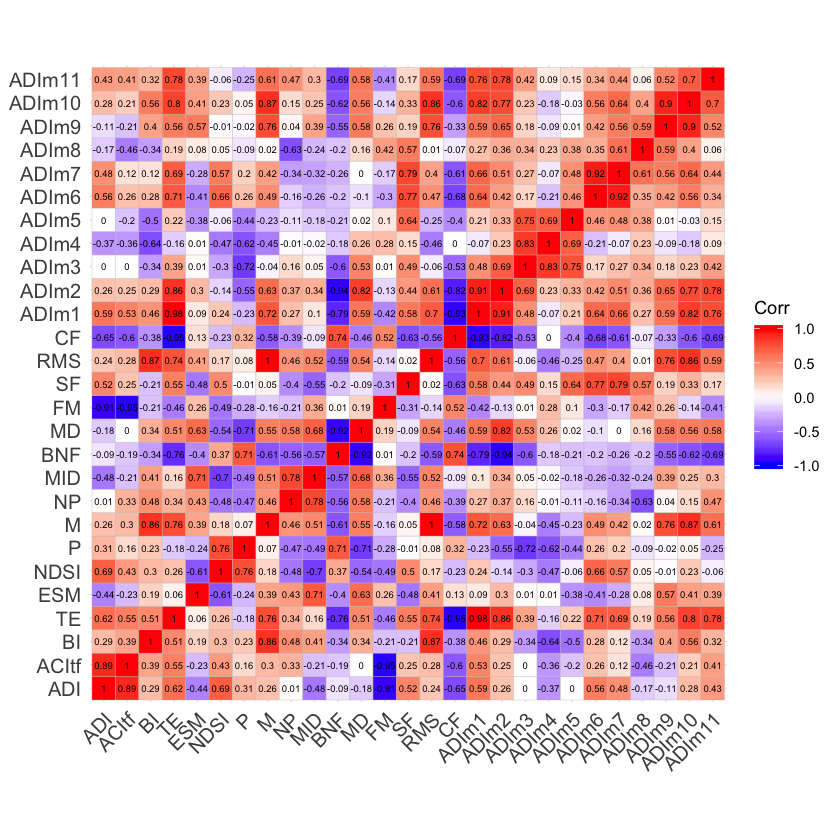

In [10]:

#install.packages("Deducer")
#install.packages("corrplot")
install.packages("ggcorrplot")

library(ggcorrplot)

correlationanalisis<-function(datanum){
    corr_matrix<-cor(datanum) ## saca matrices de correlaciones 
    corr_matrix
       library(ggcorrplot)   #para grafico de correlaciones 
    ggcorrplot(corr_matrix,lab = TRUE, lab_size=2)
    }
   
    head(datanum)
    correlationanalisis(datanum)


**Data normalization**

  shapiro and kolmogorov test 
  
  Data transformation

In [11]:
 ##NORMALIZACION DATOS: Se escoge estandarizacion de datos positivos, pues salen mas datos normalizados.
 a=0
b=0
datanum
datanum=datanum-1   
datanum
 for(i in 1:length(datanum)){
  a[i]=ks.test(datanum[,i],pnorm)$p.value
  b[i]=shapiro.test(datanum[,i])$p.value
 }
a

ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
1.2756625,-0.4399244,-0.1399083,0.51443403,-0.09380857,0.09615837,-0.6263558,-1.2449353,-0.8008424,-0.72250253,⋯,-0.0538674734,0.24283987,-0.1650974,0.42508235,-0.008937586,0.02647038,-0.48796050,-0.68330653,-0.1246885,0.4026433
0.8806682,-0.5694111,-0.5946314,0.59355962,0.40262208,-0.23337967,-0.6441693,-1.2464190,-0.9477854,-0.76403947,⋯,0.1369052416,0.44785938,-0.1295512,0.67579604,0.183419843,0.42532003,0.37896459,0.01327463,0.1739905,0.3712866
0.6805436,-0.5112027,0.5393115,0.89968519,0.81642282,-1.55211792,-0.8827165,0.1639552,-0.2357752,0.74790500,⋯,0.3807902416,-0.48679612,-1.2424054,-0.20825633,-0.144152505,-0.33748289,-0.66041825,0.25515804,0.3921317,0.7805500
1.1173119,-0.2908333,0.7830752,0.89283120,0.83205506,-0.58032962,-0.6733032,0.1585935,-0.4195157,0.09545116,⋯,0.6235624838,0.09588412,-0.8857552,-1.11873255,-0.821933994,-0.90122831,-0.63165431,0.25581858,0.7134680,0.6835989
0.4851330,-0.7071906,0.6984740,0.90628145,0.59358103,-0.38185072,-0.8451052,0.1656253,-0.7057420,0.03456361,⋯,0.7355628030,0.18563599,-0.4671831,0.04892081,0.189236802,0.64755724,0.24046184,0.77137305,0.7408529,0.6581274
0.1241397,-0.7345982,0.1477842,0.90790969,0.69537777,-0.96732320,-0.8783082,0.1646487,-0.7877812,0.26376623,⋯,0.8678258378,0.71283054,-0.2118724,0.36129253,0.404901822,0.81460634,0.63929074,1.06402022,0.9412845,0.5218428
0.1249543,-0.7449773,-0.4106129,0.02181354,0.88550913,-1.32233679,-0.3996292,-1.1543665,-0.9530926,-0.23437011,⋯,-0.2461307720,-0.66850581,-0.4163213,-0.84421655,-1.376920032,-0.67958968,0.20206360,0.24059247,0.2053448,0.5045185
-0.4207617,-0.8070504,0.1722828,-0.35994889,0.51539689,-0.86557780,-0.2561891,-1.0952515,-0.7445783,0.06270222,⋯,-0.9825011818,-1.26033899,-0.8878737,-0.72770576,-1.167041381,-1.60313991,-0.59365923,-0.30124880,-0.3002553,-0.1289253
1.1581808,-0.5149740,0.5211323,0.77544594,0.49525633,1.06315950,0.4506319,0.1505552,-0.8145920,-0.47342331,⋯,-0.0007749408,-0.55625798,-1.0049575,-0.09693990,0.859459247,1.04591166,-0.19237019,0.61045775,0.8426277,0.6887967
1.3811660,-0.4359197,0.8431464,0.79899611,0.35135777,1.10254956,0.3294891,0.1439778,-0.9629088,-0.51671257,⋯,-0.1462086142,-1.89992192,-2.9980106,-1.30118127,0.503453234,0.62058193,0.01365885,0.34970438,0.5847511,0.3201452


ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0.2756625,-1.439924,-1.1399083,-0.48556597,-1.0938086,-0.9038416,-1.6263558,-2.2449353,-1.800842,-1.7225025,⋯,-1.0538675,-0.7571601,-1.165097,-0.5749177,-1.0089376,-0.97352962,-1.4879605,-1.68330653,-1.12468848,-0.5973567
-0.1193318,-1.569411,-1.5946314,-0.40644038,-0.5973779,-1.2333797,-1.6441693,-2.2464190,-1.947785,-1.7640395,⋯,-0.8630948,-0.5521406,-1.129551,-0.3242040,-0.8165802,-0.57467997,-0.6210354,-0.98672537,-0.82600948,-0.6287134
-0.3194564,-1.511203,-0.4606885,-0.10031481,-0.1835772,-2.5521179,-1.8827165,-0.8360448,-1.235775,-0.2520950,⋯,-0.6192098,-1.4867961,-2.242405,-1.2082563,-1.1441525,-1.33748289,-1.6604183,-0.74484196,-0.60786829,-0.2194500
0.1173119,-1.290833,-0.2169248,-0.10716880,-0.1679449,-1.5803296,-1.6733032,-0.8414065,-1.419516,-0.9045488,⋯,-0.3764375,-0.9041159,-1.885755,-2.1187326,-1.8219340,-1.90122831,-1.6316543,-0.74418142,-0.28653202,-0.3164011
-0.5148670,-1.707191,-0.3015260,-0.09371855,-0.4064190,-1.3818507,-1.8451052,-0.8343747,-1.705742,-0.9654364,⋯,-0.2644372,-0.8143640,-1.467183,-0.9510792,-0.8107632,-0.35244276,-0.7595382,-0.22862695,-0.25914707,-0.3418726
-0.8758603,-1.734598,-0.8522158,-0.09209031,-0.3046222,-1.9673232,-1.8783082,-0.8353513,-1.787781,-0.7362338,⋯,-0.1321742,-0.2871695,-1.211872,-0.6387075,-0.5950982,-0.18539366,-0.3607093,0.06402022,-0.05871551,-0.4781572
-0.8750457,-1.744977,-1.4106129,-0.97818646,-0.1144909,-2.3223368,-1.3996292,-2.1543665,-1.953093,-1.2343701,⋯,-1.2461308,-1.6685058,-1.416321,-1.8442165,-2.3769200,-1.67958968,-0.7979364,-0.75940753,-0.79465519,-0.4954815
-1.4207617,-1.807050,-0.8277172,-1.35994889,-0.4846031,-1.8655778,-1.2561891,-2.0952515,-1.744578,-0.9372978,⋯,-1.9825012,-2.2603390,-1.887874,-1.7277058,-2.1670414,-2.60313991,-1.5936592,-1.30124880,-1.30025534,-1.1289253
0.1581808,-1.514974,-0.4788677,-0.22455406,-0.5047437,0.0631595,-0.5493681,-0.8494448,-1.814592,-1.4734233,⋯,-1.0007749,-1.5562580,-2.004958,-1.0969399,-0.1405408,0.04591166,-1.1923702,-0.38954225,-0.15737229,-0.3112033
0.3811660,-1.435920,-0.1568536,-0.20100389,-0.6486422,0.1025496,-0.6705109,-0.8560222,-1.962909,-1.5167126,⋯,-1.1462086,-2.8999219,-3.998011,-2.3011813,-0.4965468,-0.37941807,-0.9863411,-0.65029562,-0.41524894,-0.6798548


[1] 1.308448e-01 1.698753e-10 1.645612e-03 3.208960e-03 2.557810e-03
 [6] 3.403748e-04 1.398404e-05 2.457499e-07 4.427451e-10 6.073093e-05
[11] 1.552714e-11 5.924752e-06 1.388324e-03 8.513364e-05 8.100187e-08
[16] 4.763923e-11 1.415236e-02 2.131839e-03 3.842704e-04 2.619143e-09
[21] 2.479068e-04 7.555851e-04 1.174132e-02 1.593330e-04 9.671616e-03
[26] 4.462089e-03 8.330575e-04

In [12]:
 #Segun primeros test las variables normalizadas por shapiro test las que no pasan son: 7,9,12,16,20
#Se hace analisis con transformacion de potencia de cada variable que no paso:
#con logaritmo
b

[1] 0.4676464460 0.5881301526 0.3654123576 0.0052488135 0.3040832500
 [6] 0.4229734600 0.0351774832 0.0004183694 0.0458195784 0.6376747086
[11] 0.1544431113 0.0238750552 0.1762138080 0.8860579860 0.0005832234
[16] 0.0012640707 0.0517316133 0.6649931153 0.5388506391 0.0066881596
[21] 0.6106403660 0.3687557280 0.4928317124 0.3063608093 0.9085239094
[26] 0.5506175617 0.1413278072

In [13]:

   ks.test(log(datanum[,20]),pnorm) #la var 20 pasa con log 
   
    

Warning message in log(datanum[, 20]):
“Se han producido NaNs”

ERROR: Error in ks.test(log(datanum[, 20]), pnorm): not enough 'x' data


In [ ]:

   #datanum[,9]-min(datanum[,9])
   a=log(datanum[,9]+2) #la variable 9 pasa
   #a
   #a=a-min(a)  #para poner todos los datos positivos 
   #a
   shapiro.test(a)  
   
   a=log(datanum[,7]+2) #la variable 7 pasa
   #a=a-min(a)  #para poner todos los datos positivos 
   a

   shapiro.test(a) 

In [ ]:
 a=log(datanum[,12]+2) #la variable 12 no pasa
   #a=a-min(a)  #para poner todos los datos positivos 
   a

   shapiro.test(a) 
   ks.test((a),pnorm) 



In [ ]:
#las variables que no pasan son: #la 12,16 no pasan 
datanum[,16]
   #a=(datanum[,20]^3.151e-09)-1/3.151e-09
   a=log(datanum[,20]) #la variable 9 pasa
   a=a-min(a)  #para poner todos los datos positivos 
   a
   #shapiro.test(a) 
   #ks.test(a,pnorm)
boxplot(datanum[,16]) ##tiene 2 outliers

In [ ]:
 a=bcPower(datanum[,c(12)], 0.5, gamma=10)
   #shapiro.test(a) 
   #ks.test(a,pnorm)
boxplot(datanum[,12])

In [ ]:
boxplot(datanum[,12],datanum[,16 ])



In [ ]:

a=datanum[,16]

   shapiro.test(a) 
   ks.test(a,pnorm)
datanum[,16]
a
xr=datanum
i=16
a<- ((xr[,i]+1)-min(xr[,i]+1))/(max(xr[,i]+1)-min(xr[,i]+1))  #para poner todos los datos de 0 a 1 
a
shapiro.test(log(a))
   ks.test(log(a),pnorm)

In [ ]:
a=bcPower(datanum[,c(16)], 0, gamma=2,jacobian.adjusted=TRUE)
#powerTransform(datos[,c(10)], family="bcPower")


In [14]:
#incluiremos las variables normalizadas con log en un nuevo dataset 
datanorm=datanum
head(datanum)
datanorm[,20]=log(datanum[,20])
datanorm[,7]=log(datanum[,7]+2)
datanorm[,9]=log(datanum[,9]+2)
datanorm 

ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0.2756625,-1.439924,-1.1399083,-0.48556597,-1.0938086,-0.9038416,-1.626356,-2.2449353,-1.800842,-1.7225025,⋯,-1.0538675,-0.7571601,-1.165097,-0.5749177,-1.0089376,-0.9735296,-1.4879605,-1.68330653,-1.12468848,-0.5973567
-0.1193318,-1.569411,-1.5946314,-0.40644038,-0.5973779,-1.2333797,-1.644169,-2.2464190,-1.947785,-1.7640395,⋯,-0.8630948,-0.5521406,-1.129551,-0.3242040,-0.8165802,-0.5746800,-0.6210354,-0.98672537,-0.82600948,-0.6287134
-0.3194564,-1.511203,-0.4606885,-0.10031481,-0.1835772,-2.5521179,-1.882716,-0.8360448,-1.235775,-0.2520950,⋯,-0.6192098,-1.4867961,-2.242405,-1.2082563,-1.1441525,-1.3374829,-1.6604183,-0.74484196,-0.60786829,-0.2194500
0.1173119,-1.290833,-0.2169248,-0.10716880,-0.1679449,-1.5803296,-1.673303,-0.8414065,-1.419516,-0.9045488,⋯,-0.3764375,-0.9041159,-1.885755,-2.1187326,-1.8219340,-1.9012283,-1.6316543,-0.74418142,-0.28653202,-0.3164011
-0.5148670,-1.707191,-0.3015260,-0.09371855,-0.4064190,-1.3818507,-1.845105,-0.8343747,-1.705742,-0.9654364,⋯,-0.2644372,-0.8143640,-1.467183,-0.9510792,-0.8107632,-0.3524428,-0.7595382,-0.22862695,-0.25914707,-0.3418726
-0.8758603,-1.734598,-0.8522158,-0.09209031,-0.3046222,-1.9673232,-1.878308,-0.8353513,-1.787781,-0.7362338,⋯,-0.1321742,-0.2871695,-1.211872,-0.6387075,-0.5950982,-0.1853937,-0.3607093,0.06402022,-0.05871551,-0.4781572


Warning message in log(datanum[, 20]):
“Se han producido NaNs”

ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0.2756625,-1.439924,-1.1399083,-0.48556597,-1.0938086,-0.9038416,-0.9844512,-2.2449353,-1.6136588,-1.7225025,⋯,-1.0538675,-0.7571601,NaN,-0.5749177,-1.0089376,-0.97352962,-1.4879605,-1.68330653,-1.12468848,-0.5973567
-0.1193318,-1.569411,-1.5946314,-0.40644038,-0.5973779,-1.2333797,-1.0333003,-2.2464190,-2.9523932,-1.7640395,⋯,-0.8630948,-0.5521406,NaN,-0.3242040,-0.8165802,-0.57467997,-0.6210354,-0.98672537,-0.82600948,-0.6287134
-0.3194564,-1.511203,-0.4606885,-0.10031481,-0.1835772,-2.5521179,-2.1431610,-0.8360448,-0.2688933,-0.2520950,⋯,-0.6192098,-1.4867961,NaN,-1.2082563,-1.1441525,-1.33748289,-1.6604183,-0.74484196,-0.60786829,-0.2194500
0.1173119,-1.290833,-0.2169248,-0.10716880,-0.1679449,-1.5803296,-1.1187228,-0.8414065,-0.5438925,-0.9045488,⋯,-0.3764375,-0.9041159,NaN,-2.1187326,-1.8219340,-1.90122831,-1.6316543,-0.74418142,-0.28653202,-0.3164011
-0.5148670,-1.707191,-0.3015260,-0.09371855,-0.4064190,-1.3818507,-1.8650089,-0.8343747,-1.2232983,-0.9654364,⋯,-0.2644372,-0.8143640,NaN,-0.9510792,-0.8107632,-0.35244276,-0.7595382,-0.22862695,-0.25914707,-0.3418726
-0.8758603,-1.734598,-0.8522158,-0.09209031,-0.3046222,-1.9673232,-2.1062638,-0.8353513,-1.5501373,-0.7362338,⋯,-0.1321742,-0.2871695,NaN,-0.6387075,-0.5950982,-0.18539366,-0.3607093,0.06402022,-0.05871551,-0.4781572
-0.8750457,-1.744977,-1.4106129,-0.97818646,-0.1144909,-2.3223368,-0.5102078,-2.1543665,-3.0595798,-1.2343701,⋯,-1.2461308,-1.6685058,NaN,-1.8442165,-2.3769200,-1.67958968,-0.7979364,-0.75940753,-0.79465519,-0.4954815
-1.4207617,-1.807050,-0.8277172,-1.35994889,-0.4846031,-1.8655778,-0.2959684,-2.0952515,-1.3648394,-0.9372978,⋯,-1.9825012,-2.2603390,NaN,-1.7277058,-2.1670414,-2.60313991,-1.5936592,-1.30124880,-1.30025534,-1.1289253
0.1581808,-1.514974,-0.4788677,-0.22455406,-0.5047437,0.0631595,0.3719993,-0.8494448,-1.6851962,-1.4734233,⋯,-1.0007749,-1.5562580,NaN,-1.0969399,-0.1405408,0.04591166,-1.1923702,-0.38954225,-0.15737229,-0.3112033
0.3811660,-1.435920,-0.1568536,-0.20100389,-0.6486422,0.1025496,0.2847947,-0.8560222,-3.2943761,-1.5167126,⋯,-1.1462086,-2.8999219,NaN,-2.3011813,-0.4965468,-0.37941807,-0.9863411,-0.65029562,-0.41524894,-0.6798548


In [15]:
a=0
b=0
 for(i in 1:length(datanum)){
  a[i]=ks.test(datanorm[,i],pnorm)$p.value
  b[i]=shapiro.test(datanorm[,i])$p.value
 }
a

ERROR: Error in ks.test(datanorm[, i], pnorm): not enough 'x' data


In [16]:
b

[1] 0.4676464460 0.5881301526 0.3654123576 0.0052488135 0.3040832500
 [6] 0.4229734600 0.4261496229 0.0004183694 0.3142905807 0.6376747086
[11] 0.1544431113 0.0238750552 0.1762138080 0.8860579860 0.0005832234
[16] 0.0012640707 0.0517316133 0.6649931153 0.5388506391

In [17]:
#las unicas que no pasan son las columnas 12 y 16
dataprub=datanum[,16]
mean(dataprub)
max(dataprub)
min(dataprub)
dataprub

[1] -1.519444

[1] -1.361771

[1] -1.577652

[1] -1.552710 -1.548259 -1.577652 -1.577217 -1.568928 -1.565219 -1.384209
 [8] -1.361771 -1.533628 -1.524847

In [18]:
head(datanorm)

ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0.2756625,-1.439924,-1.1399083,-0.48556597,-1.0938086,-0.9038416,-0.9844512,-2.2449353,-1.6136588,-1.7225025,⋯,-1.0538675,-0.7571601,NaN,-0.5749177,-1.0089376,-0.9735296,-1.4879605,-1.68330653,-1.12468848,-0.5973567
-0.1193318,-1.569411,-1.5946314,-0.40644038,-0.5973779,-1.2333797,-1.0333003,-2.2464190,-2.9523932,-1.7640395,⋯,-0.8630948,-0.5521406,NaN,-0.3242040,-0.8165802,-0.5746800,-0.6210354,-0.98672537,-0.82600948,-0.6287134
-0.3194564,-1.511203,-0.4606885,-0.10031481,-0.1835772,-2.5521179,-2.1431610,-0.8360448,-0.2688933,-0.2520950,⋯,-0.6192098,-1.4867961,NaN,-1.2082563,-1.1441525,-1.3374829,-1.6604183,-0.74484196,-0.60786829,-0.2194500
0.1173119,-1.290833,-0.2169248,-0.10716880,-0.1679449,-1.5803296,-1.1187228,-0.8414065,-0.5438925,-0.9045488,⋯,-0.3764375,-0.9041159,NaN,-2.1187326,-1.8219340,-1.9012283,-1.6316543,-0.74418142,-0.28653202,-0.3164011
-0.5148670,-1.707191,-0.3015260,-0.09371855,-0.4064190,-1.3818507,-1.8650089,-0.8343747,-1.2232983,-0.9654364,⋯,-0.2644372,-0.8143640,NaN,-0.9510792,-0.8107632,-0.3524428,-0.7595382,-0.22862695,-0.25914707,-0.3418726
-0.8758603,-1.734598,-0.8522158,-0.09209031,-0.3046222,-1.9673232,-2.1062638,-0.8353513,-1.5501373,-0.7362338,⋯,-0.1321742,-0.2871695,NaN,-0.6387075,-0.5950982,-0.1853937,-0.3607093,0.06402022,-0.05871551,-0.4781572


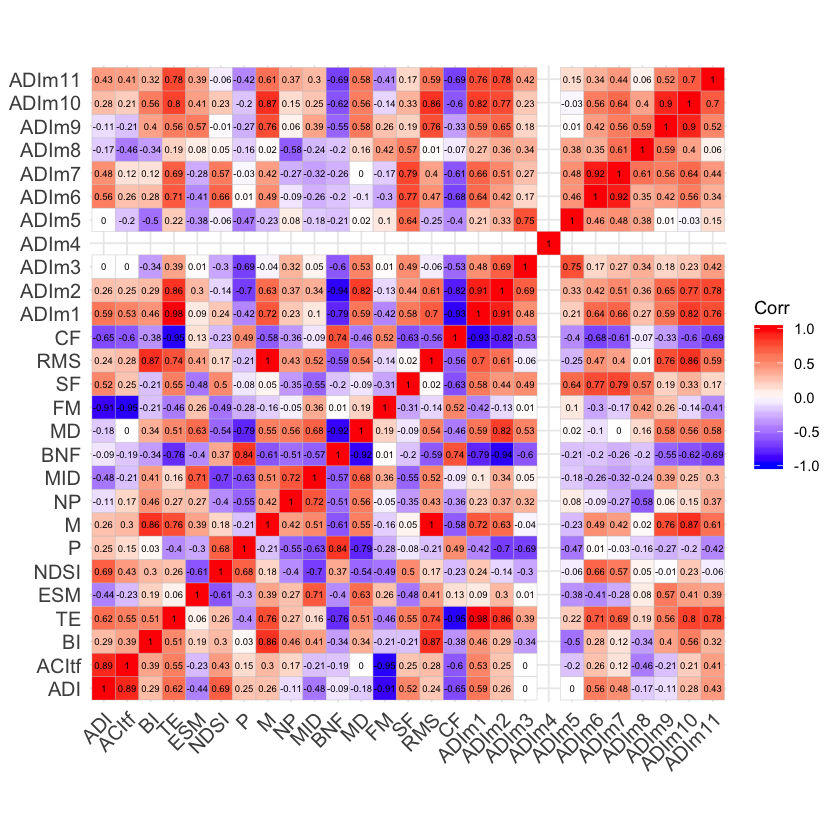

In [19]:
correlationanalisis(datanorm)

In [20]:
ADIM4=datanorm[,20]
datosnormfil <- subset( datanorm, select = -ADIm4 ) 



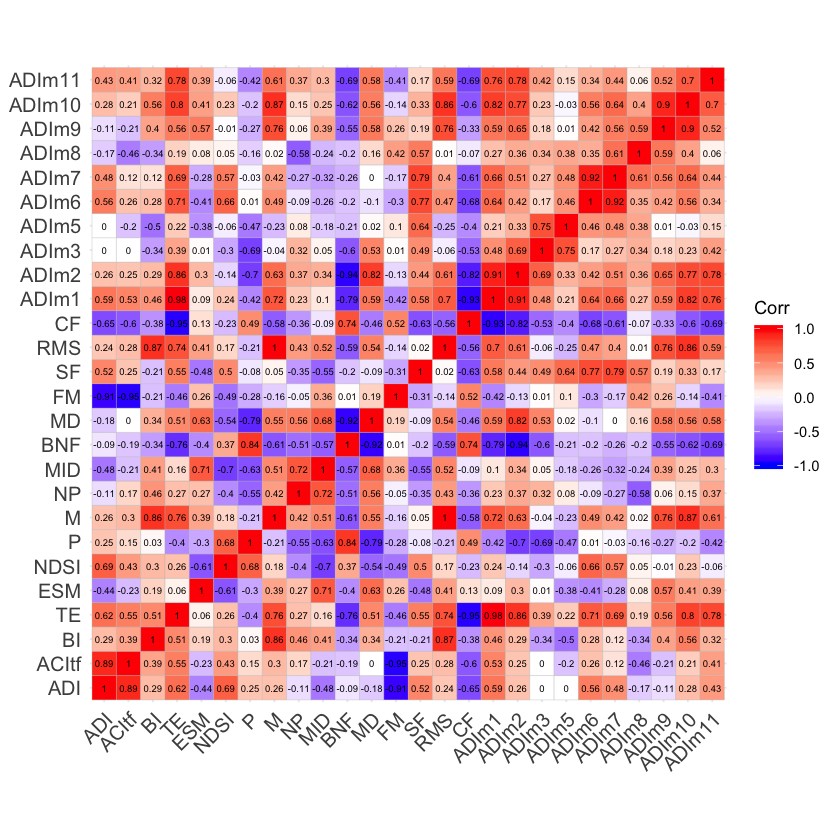

In [21]:
correlationanalisis(datosnormfil)

In [22]:
corr_matrix<-cor(datosnormfil) ## saca matrices de correlaciones 
    corr_matrix

,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm1,ADIm2,ADIm3,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
ADI,1.0000000000,0.8910256502,0.29484460,0.62310542,-0.44414868,0.688549879,0.254374414,0.26277720,-0.10724821,-0.47681107,⋯,0.58649426,0.2574312,0.0014319653,0.0005366684,0.558864133,0.478145042,-0.172400624,-0.111200038,0.28134369,0.43203979
ACItf,0.8910256502,1.0000000000,0.39153043,0.55121868,-0.22663417,0.434353280,0.145976544,0.29575116,0.17274360,-0.20734638,⋯,0.52692793,0.2529820,-0.0002338296,-0.2036557862,0.261475757,0.115002617,-0.460257773,-0.208975057,0.21018337,0.41187056
BI,0.2948446031,0.3915304299,1.00000000,0.50977124,0.19238963,0.298076892,0.025258207,0.85935131,0.46214356,0.41477267,⋯,0.46006372,0.2921623,-0.3416835942,-0.5034512047,0.280391289,0.123053097,-0.344551410,0.400475196,0.55786119,0.32143474
TE,0.6231054228,0.5512186812,0.50977124,1.00000000,0.05845202,0.261378523,-0.403902128,0.76092833,0.27310733,0.15621547,⋯,0.97745649,0.8629507,0.3889522373,0.2210437144,0.707462085,0.687355422,0.186725638,0.562703292,0.79565183,0.77721306
ESM,-0.4441486824,-0.2266341720,0.19238963,0.05845202,1.00000000,-0.610828150,-0.304708503,0.39249180,0.26684700,0.70761744,⋯,0.09261704,0.2986369,0.0055646298,-0.3807414664,-0.406080784,-0.278162915,0.083394851,0.569162739,0.40700326,0.38601607
NDSI,0.6885498792,0.4343532799,0.29807689,0.26137852,-0.61082815,1.000000000,0.681512024,0.17871652,-0.39617664,-0.70042929,⋯,0.24088097,-0.1374859,-0.3022718524,-0.0568430773,0.656374034,0.570346328,0.053524870,-0.005331336,0.22682824,-0.06228260
P,0.2543744136,0.1459765437,0.02525821,-0.40390213,-0.30470850,0.681512024,1.000000000,-0.21451408,-0.55442065,-0.62541876,⋯,-0.41572722,-0.7047400,-0.6916345876,-0.4695160246,0.009325109,-0.030275129,-0.156236353,-0.273537296,-0.19555099,-0.41608491
M,0.2627772038,0.2957511604,0.85935131,0.76092833,0.39249180,0.178716518,-0.214514079,1.00000000,0.42224123,0.50810842,⋯,0.71888192,0.6278789,-0.0374766493,-0.2337586694,0.488109775,0.424241984,0.016164657,0.755465342,0.86677790,0.60606498
NP,-0.1072482120,0.1727435958,0.46214356,0.27310733,0.26684700,-0.396176641,-0.554420652,0.42224123,1.00000000,0.71599221,⋯,0.22934575,0.3664698,0.3151812098,0.0778491302,-0.089472356,-0.274179449,-0.578141154,0.059091504,0.14883988,0.36904879
MID,-0.4768110719,-0.2073463765,0.41477267,0.15621547,0.70761744,-0.700429292,-0.625418757,0.50810842,0.71599221,1.00000000,⋯,0.10481723,0.3383757,0.0467355187,-0.1819200739,-0.258941874,-0.320590642,-0.236000661,0.388979423,0.24965257,0.29990380


In [23]:
## Se sacan los eigenvalores-vectores de la variable
res.eig <- eigen(corr_matrix)
res.eig

eigen() decomposition
$values
 [1]  1.050581e+01  6.002196e+00  4.093951e+00  2.914397e+00  1.241385e+00
 [6]  5.870221e-01  3.727339e-01  2.367431e-01  4.576369e-02  5.757064e-16
[11]  6.184412e-17  5.995044e-17  3.287464e-17  2.475286e-17  2.467154e-17
[16] -5.148607e-18 -2.773112e-17 -4.512105e-17 -5.787972e-17 -1.498820e-16
[21] -1.646820e-16 -1.839804e-16 -2.057730e-16 -2.155551e-16 -2.466888e-16
[26] -6.113944e-16

$vectors
             [,1]         [,2]         [,3]         [,4]          [,5]
 [1,] -0.13442682 -0.310483301  0.162710676  0.165258138 -0.1530825406
 [2,] -0.12325292 -0.198020433  0.265555267  0.288982566 -0.2046237202
 [3,] -0.16287937  0.038833535  0.361365871 -0.119414050  0.2615261981
 [4,] -0.29861178 -0.083672417  0.024076987  0.041708884 -0.0011721869
 [5,] -0.07259852  0.312797266  0.077536334 -0.146798916 -0.3803639508
 [6,] -0.03488913 -0.358569856  0.130052350 -0.167418923  0.1254438257
 [7,]  0.15621917 -0.233787363  0.217780762 -0.224704633 -0.121890897

***PCA***

"we seek to maximize the variance of a linear com- bination of 
the variables...
we are essentially searching for a dimension along which the observations 
are max- imally separated or spread out." (Rencher)

this page shows the basics of PCA : http://www.sthda.com/english/wiki/print.php?id=206


In [24]:
res.pca <- prcomp(datosnormfil, scale = TRUE)
res.pca



Standard deviations (1, .., p=10):
 [1] 3.241267e+00 2.449938e+00 2.023351e+00 1.707160e+00 1.114175e+00
 [6] 7.661736e-01 6.105194e-01 4.865626e-01 2.139245e-01 6.192895e-16

Rotation (n x k) = (26 x 10):
               PC1          PC2          PC3          PC4           PC5
ADI     0.13442682  0.310483301  0.162710676  0.165258138  0.1530825406
ACItf   0.12325292  0.198020433  0.265555267  0.288982566  0.2046237202
BI      0.16287937 -0.038833535  0.361365871 -0.119414050 -0.2615261981
TE      0.29861178  0.083672417  0.024076987  0.041708884  0.0011721869
ESM     0.07259852 -0.312797266  0.077536334 -0.146798916  0.3803639508
NDSI    0.03488913  0.358569856  0.130052350 -0.167418923 -0.1254438257
P      -0.15621917  0.233787363  0.217780762 -0.224704633  0.1218908973
M       0.25288103 -0.061525976  0.209144022 -0.183571738 -0.1436265333
NP      0.11556049 -0.216077947  0.137076401  0.286875788 -0.3916542187
MID     0.09628855 -0.354075821  0.103887368  0.017435595 -0.1907224084
BN

In [26]:
install.packages("factoextra")

library(factoextra)
get_pca_var(res.pca)


also installing the dependencies ‘modeltools’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘trimcluster’, ‘fpc’, ‘viridis’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [28]:
library("factoextra")
get_eig(res.pca)#tabla de eigenvalores varianza acumulada


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.050581e+01,4.040696e+01,40.40696
Dim.2,6.002196e+00,2.308537e+01,63.49233
Dim.3,4.093951e+00,1.574596e+01,79.23829
Dim.4,2.914397e+00,1.120922e+01,90.44751
Dim.5,1.241385e+00,4.774557e+00,95.22207
Dim.6,5.870221e-01,2.257777e+00,97.47984
Dim.7,3.727339e-01,1.433592e+00,98.91344
Dim.8,2.367431e-01,9.105505e-01,99.82399
Dim.9,4.576369e-02,1.760142e-01,100.00000
Dim.10,3.835195e-31,1.475075e-30,100.00000


***DECIDING HOWMANY COMPONENTS TO RETAIN***

According to the cumulative variance percent, we can take the firts four
variables for the criteria of the 80 percent. 

Use the scree graph, a plot of λi versus i , and look for a natural break between the “large”eigenvalues and the “small”eigenvalues

Retain the components whose eigenvalues are greater than the average of the eigenvalues

Retain sufficient components to account for a specified percentage of the total variance, say, 80%.

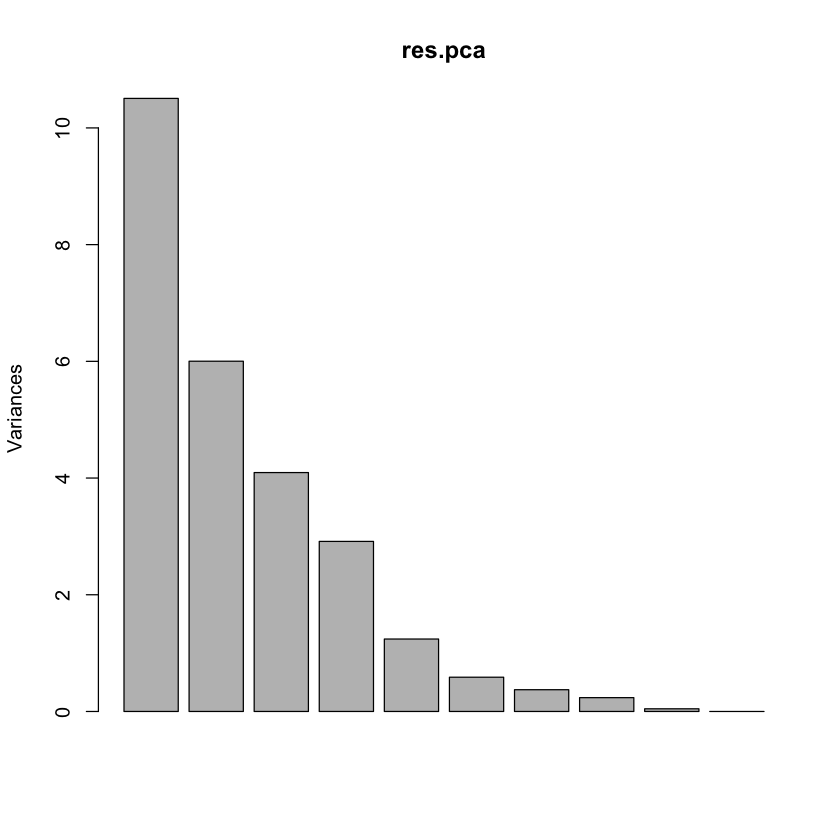

In [33]:
plot(res.pca)  #varianzas


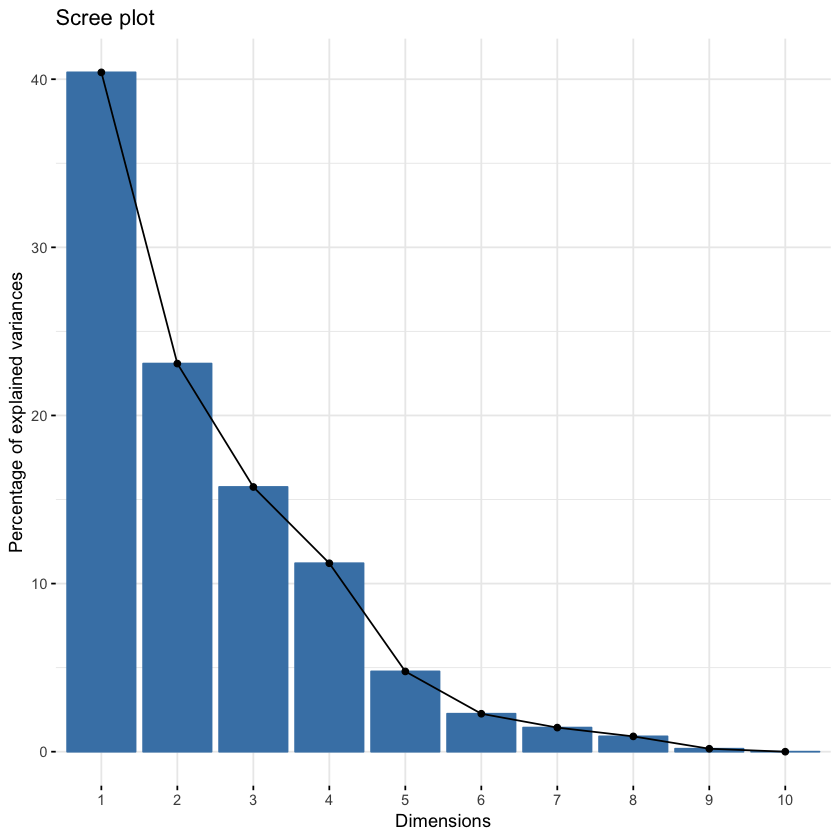

In [29]:
fviz_eig(res.pca)

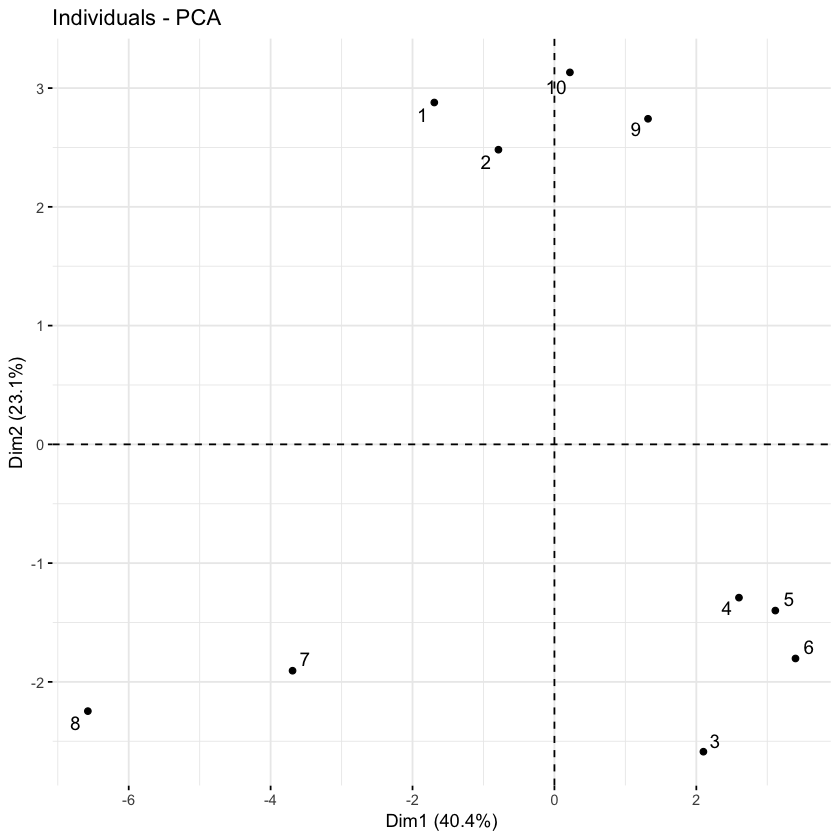

In [30]:
fviz_pca_ind(res.pca, repel=TRUE)#gráfico individuos y PCA


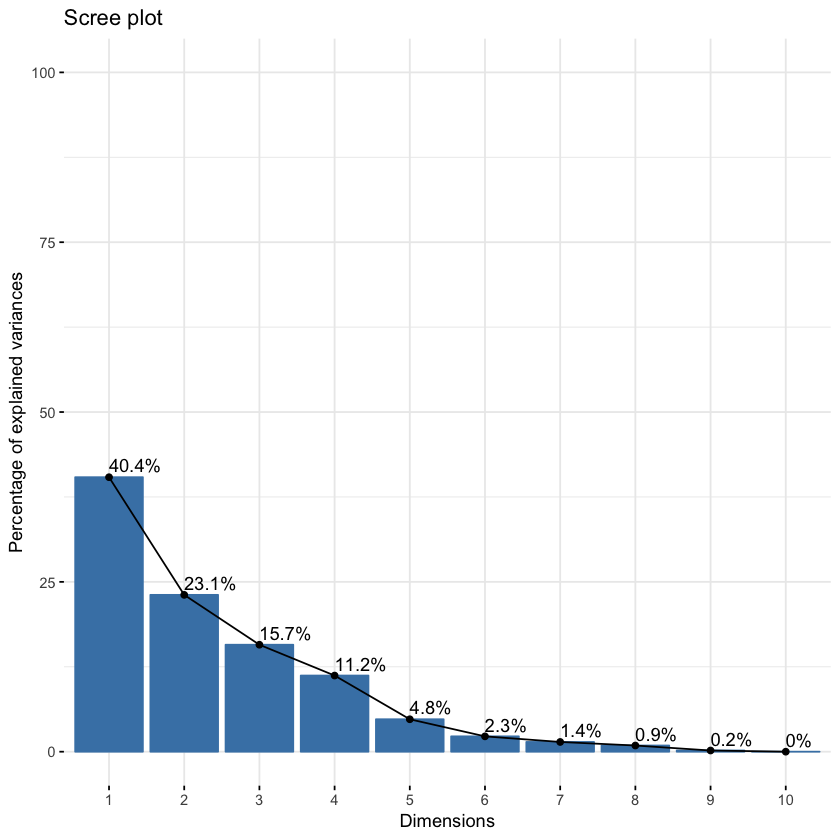

In [31]:
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 100))#screeplot


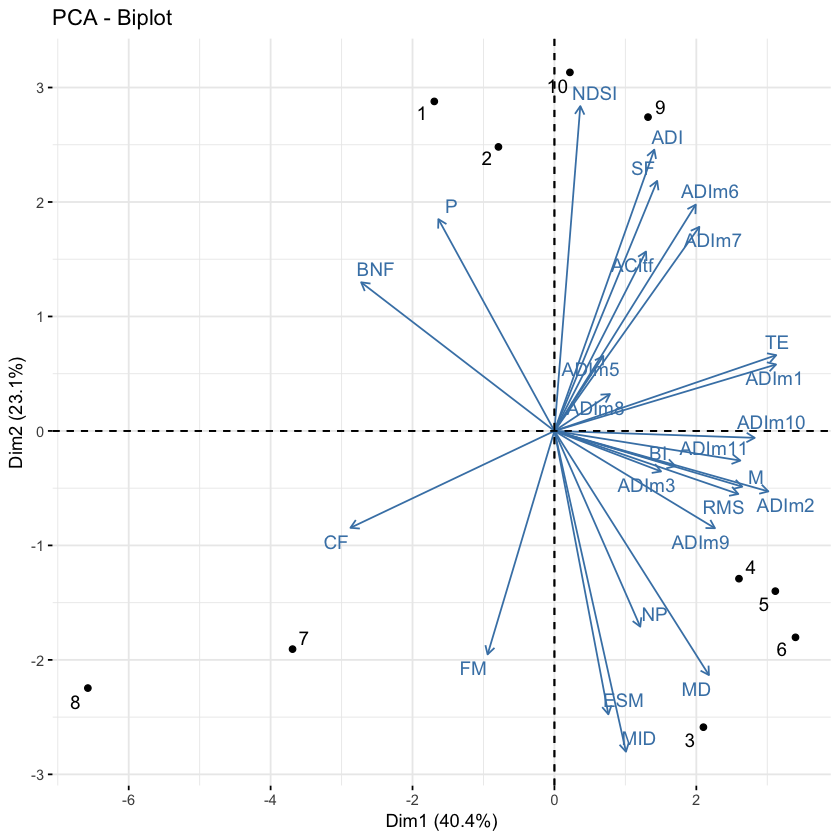

In [32]:
fviz_pca_biplot(res.pca, repel = TRUE, addlabels = TRUE) #biplot


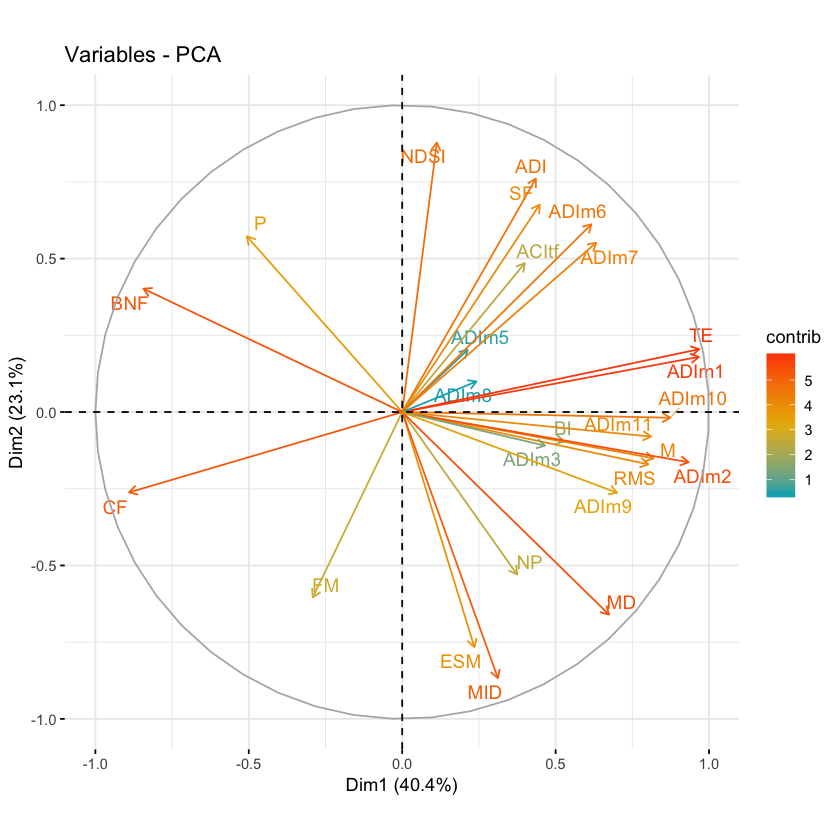

In [33]:
fviz_pca_var(res.pca, col.var="contrib",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = TRUE)#grafico de pesos de los componentes a color


As you can see in the image above, the variables that are most dominant 
within the firts component are NDSI,MID,ESV, ADI, SF and NP. and for the second
component are ADI in diferent frecuencyes(m11,m10,m2,m9), and other variables
like  RMS, M, TE,CF and BNF.

This show that the firts component are correlated to the biodiversity features 
like the acoustic niche,the changes of sounds in recordings, and the variability 
in the frecuencies. 
In the other hand, the second components belongs to properties of the amplitude and presure level like the 
RMS, M and BNF. But show that the ADI(measure the Acoustic niche) in some frecuencies 
contributes in this dimention. 




In [34]:
pred<-predict(res.pca)


In [35]:
pred

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
1,-1.6930809,2.878531,-0.8502448,2.9559673,-0.7362406,0.22325680,-0.06950479,0.59072048,0.2404599163,4.962128e-16
2,-0.7891560,2.481185,-3.0946775,0.8495277,0.8045932,0.03160419,0.20694265,-0.66519992,-0.2964953007,6.796544e-16
3,2.0997789,-2.587885,1.3300687,1.6174071,-0.5972985,-0.74838581,1.20413011,-0.12348490,-0.0421964648,4.774641e-16
4,2.6009615,-1.290722,2.6687346,1.8781027,1.3235282,0.52354485,-0.84981363,-0.31267339,-0.0009357844,3.165460e-16
5,3.1134232,-1.399563,-1.0802649,-0.8274075,-0.7237832,0.48090863,-0.29232662,0.80641812,-0.3408651707,6.521016e-16
6,3.3975406,-1.802973,-2.7803777,-1.3743478,-0.4752939,0.28321153,-0.13340825,-0.39878112,0.3633691291,8.435481e-16
7,-3.6909903,-1.905995,-0.7225046,-1.0378047,2.1713202,-0.49401599,0.18804844,0.53000083,0.0970744113,6.504724e-16
8,-6.5758155,-2.246260,0.8548879,-0.4752557,-1.4696942,0.26695262,-0.36760410,-0.36594922,-0.0668969376,7.476581e-16
9,1.3190213,2.741436,1.2233747,-1.3930090,-0.4695085,-1.62715109,-0.59693049,-0.04085604,-0.0007990930,1.546908e-16
10,0.2183172,3.132247,2.4510035,-2.1931801,0.1723774,1.06007427,0.71046669,-0.02019485,0.0472852945,1.744196e-16


***FACTOR ANALYSIS***

In factor analysis we represent the variables y1, y2,... , yp as linear 
combinations of a few random variables f1, f2,... , fm (m < p) called factors.
The factors are underlying constructs or latent variables that 
“generate” the y’s.

In factor analysis, the original variables are expressed as linear 
combinations of the factors

In [36]:
datos_trans=datosnormfil




In [38]:
fit<-factanal(datanum,1,method="ml",scores="regression",rotation="varimax") ##1- es el numero de factores, ml es maximaverosimilitud, la rotacion es para que sea mas facil la interpretacion


ERROR: Error in solve.default(cv): sistema es computacionalmente singular: número de condición recíproco = 4.91945e-19


In [43]:
scree.plot(fit$correlation) #screeplot
ev <- eigen(cor(datos_trans))
ev

ERROR: Error in scree.plot(fit$correlation): no se pudo encontrar la función "scree.plot"


In [44]:
scree.plot(fit$correlation) #screeplot


ERROR: Error in scree.plot(fit$correlation): no se pudo encontrar la función "scree.plot"


In [45]:
estandarizar(datosnormfil)

ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm1,ADIm2,ADIm3,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0.2756625,-1.439924,-1.1399083,-0.48556597,-1.0938086,-0.9038416,0.45972155,1.6964242,0.36712592,0.4547231,⋯,0.04153694,0.144387204,0,0.05750230,0.11682367,0.7490039,0.0026819,0.0249415445,1.4552863,0.9286337
-0.1193318,-1.569411,-1.5946314,-0.40644038,-0.5973779,-1.2333797,0.32411878,1.3014299,0.23763926,0.0000000,⋯,0.00000000,0.130052628,0,0.18220192,0.18309473,1.1978860,0.0000000,0.0293927875,1.7083340,1.1194064
-0.3194564,-1.511203,-0.4606885,-0.10031481,-0.1835772,-2.5521179,0.47055621,1.1013053,0.29584762,1.1339429,⋯,1.51194447,0.021660665,0,0.80080887,0.20547212,0.2590352,1.2967838,0.0000000000,1.8104790,1.3632914
0.1173119,-1.290833,-0.2169248,-0.10716880,-0.1679449,-1.5803296,0.67562787,1.5380736,0.51621706,1.3777066,⋯,0.85949063,0.019048799,0,1.14652213,0.00000000,0.3904814,1.2924652,0.0004349985,2.3417689,1.6060637
-0.5148670,-1.707191,-0.3015260,-0.09371855,-0.4064190,-1.3818507,0.30236165,0.9058947,0.09985977,1.2931054,⋯,0.79860308,0.004079605,0,1.13273147,0.49865664,0.6007069,1.2982476,0.0087241562,2.2486192,1.7180640
-0.8758603,-1.734598,-0.8522158,-0.09209031,-0.3046222,-1.9673232,0.12676562,0.5449015,0.07245217,0.7424156,⋯,1.02780570,0.000000000,0,1.03749764,0.54920130,0.8707449,1.2976420,0.0124333219,2.2408900,1.8503270
-0.8750457,-1.744977,-1.4106129,-0.97818646,-0.1144909,-2.3223368,0.55074517,0.5457161,0.06207302,0.1840185,⋯,0.52966936,0.166328869,0,0.43322827,0.43802143,0.1282646,0.1269029,0.1934427756,0.7814822,0.7363704
-1.4207617,-1.807050,-0.8277172,-1.35994889,-0.4846031,-1.8655778,0.68647404,0.0000000,0.00000000,0.7669142,⋯,0.82674169,0.246637008,0,0.02595158,0.58719806,0.0000000,0.2104313,0.2158804611,0.0000000,0.0000000
0.1581808,-1.514974,-0.4788677,-0.22455406,-0.5047437,0.0631595,0.06407106,1.5789426,0.29207639,1.1157637,⋯,0.29061616,0.190745770,0,0.00000000,0.09016208,0.7011531,1.2834380,0.0440242376,1.8104006,0.9817262
0.3811660,-1.435920,-0.1568536,-0.20100389,-0.6486422,0.1025496,0.00000000,1.8019277,0.37113068,1.4377778,⋯,0.24732690,0.154838481,0,0.02761412,0.15605913,0.7120800,1.2819112,0.0528046881,1.8802753,0.8362926


In [41]:
#datosnormfill <- subset( datanorm, select = -MD ) ##Saco la var BNT por que no aporta
#datosnormfill <- subset( datanorm, select = -ADIm1 ) ##Saco la var BNT por que no aporta

fit<-factanal(datanum,1,method="ml",scores="regression",rotation="varimax") ##1- es el numero de factores, ml es maximaverosimilitud, la rotacion es para que sea mas facil la interpretacion




ERROR: Error in solve.default(cv): sistema es computacionalmente singular: número de condición recíproco = 4.91945e-19


In [42]:
  write.csv(datanum, file="datano.csv", sep=';',row.names=FALSE)


Warning message in write.csv(datanum, file = "datano.csv", sep = ";", row.names = FALSE):
“attempt to set 'sep' ignored”

In [48]:
    datanorm


ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,MID,⋯,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0.2756625,-1.439924,-1.1399083,-0.48556597,-1.0938086,-0.9038416,-0.9844512,-2.2449353,-1.6136588,-1.7225025,⋯,-1.0538675,-0.7571601,NaN,-0.5749177,-1.0089376,-0.97352962,-1.4879605,-1.68330653,-1.12468848,-0.5973567
-0.1193318,-1.569411,-1.5946314,-0.40644038,-0.5973779,-1.2333797,-1.0333003,-2.2464190,-2.9523932,-1.7640395,⋯,-0.8630948,-0.5521406,NaN,-0.3242040,-0.8165802,-0.57467997,-0.6210354,-0.98672537,-0.82600948,-0.6287134
-0.3194564,-1.511203,-0.4606885,-0.10031481,-0.1835772,-2.5521179,-2.1431610,-0.8360448,-0.2688933,-0.2520950,⋯,-0.6192098,-1.4867961,NaN,-1.2082563,-1.1441525,-1.33748289,-1.6604183,-0.74484196,-0.60786829,-0.2194500
0.1173119,-1.290833,-0.2169248,-0.10716880,-0.1679449,-1.5803296,-1.1187228,-0.8414065,-0.5438925,-0.9045488,⋯,-0.3764375,-0.9041159,NaN,-2.1187326,-1.8219340,-1.90122831,-1.6316543,-0.74418142,-0.28653202,-0.3164011
-0.5148670,-1.707191,-0.3015260,-0.09371855,-0.4064190,-1.3818507,-1.8650089,-0.8343747,-1.2232983,-0.9654364,⋯,-0.2644372,-0.8143640,NaN,-0.9510792,-0.8107632,-0.35244276,-0.7595382,-0.22862695,-0.25914707,-0.3418726
-0.8758603,-1.734598,-0.8522158,-0.09209031,-0.3046222,-1.9673232,-2.1062638,-0.8353513,-1.5501373,-0.7362338,⋯,-0.1321742,-0.2871695,NaN,-0.6387075,-0.5950982,-0.18539366,-0.3607093,0.06402022,-0.05871551,-0.4781572
-0.8750457,-1.744977,-1.4106129,-0.97818646,-0.1144909,-2.3223368,-0.5102078,-2.1543665,-3.0595798,-1.2343701,⋯,-1.2461308,-1.6685058,NaN,-1.8442165,-2.3769200,-1.67958968,-0.7979364,-0.75940753,-0.79465519,-0.4954815
-1.4207617,-1.807050,-0.8277172,-1.35994889,-0.4846031,-1.8655778,-0.2959684,-2.0952515,-1.3648394,-0.9372978,⋯,-1.9825012,-2.2603390,NaN,-1.7277058,-2.1670414,-2.60313991,-1.5936592,-1.30124880,-1.30025534,-1.1289253
0.1581808,-1.514974,-0.4788677,-0.22455406,-0.5047437,0.0631595,0.3719993,-0.8494448,-1.6851962,-1.4734233,⋯,-1.0007749,-1.5562580,NaN,-1.0969399,-0.1405408,0.04591166,-1.1923702,-0.38954225,-0.15737229,-0.3112033
0.3811660,-1.435920,-0.1568536,-0.20100389,-0.6486422,0.1025496,0.2847947,-0.8560222,-3.2943761,-1.5167126,⋯,-1.1462086,-2.8999219,NaN,-2.3011813,-0.4965468,-0.37941807,-0.9863411,-0.65029562,-0.41524894,-0.6798548


In [40]:
datnumr<-read.csv(file="numeros.csv",header=T, sep=";") #the data is read 

